In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# GeoTiff Images
import rasterio
from osgeo import gdal

# Visualisation
from matplotlib import pyplot as plt
import matplotlib.image as img
from matplotlib.pyplot import figure
from PIL import Image

# Model Building
import ultralytics
from ultralytics import YOLO
import labelme2yolo

# Others
import os
import shutil
import zipfile

%matplotlib inline

In [8]:
def rename_files(directory_path, prefix):
    # Define the directory path where your files are located
    directory_path = directory_path
    
    # Get a list of all files in the directory
    files = os.listdir(directory_path)
    
    # Loop through each file in the directory
    for filename in files:
        # Check if the item is a file (not a directory)
        if os.path.isfile(os.path.join(directory_path, filename)):
            # Replace the word "tile" with the prefix of choice
            new_filename = filename.replace("tile", prefix)
    
            # Construct the full path to the original and new files
            old_filepath = os.path.join(directory_path, filename)
            new_filepath = os.path.join(directory_path, new_filename)
    
            # Rename the file
            os.rename(old_filepath, new_filepath)
    
    print("Files renamed successfully.")

In [10]:
rename_files("../ALL_DATA", "Pre")

Files renamed successfully.


In [11]:
!labelme2yolo --json_dir T:/EY_Challenge/EY_Challenge/ALL_DATA
!labelme2yolo --json_dir ./Annotated_Data

INFO:labelme2yolo:Converting train set ...

100%|██████████| 33/33 [00:02<00:00, 12.43it/s]
INFO:labelme2yolo:Converting val set ...

100%|██████████| 8/8 [00:00<00:00, 12.27it/s]
INFO:labelme2yolo:Converting test set ...

0it [00:00, ?it/s]
0it [00:00, ?it/s]
INFO:labelme2yolo:Converting train set ...

0it [00:00, ?it/s]
0it [00:00, ?it/s]
INFO:labelme2yolo:Converting val set ...

0it [00:00, ?it/s]
0it [00:00, ?it/s]
INFO:labelme2yolo:Converting test set ...

0it [00:00, ?it/s]
0it [00:00, ?it/s]


In [12]:
#Loading the model
model = YOLO('yolov8n.pt')
# Display model information (optional)
model.info()

100%|██████████| 6.23M/6.23M [00:00<00:00, 14.6MB/s]


YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [16]:
# Train the model on the dataset for 50 epochs
results = model.train(data="../ALL_DATA/YOLODataset/dataset.yaml", epochs=50, imgsz=512)

New https://pypi.org/project/ultralytics/8.1.24 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.13 🚀 Python-3.9.17 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=../ALL_DATA/YOLODataset/dataset.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None,

100%|██████████| 755k/755k [00:00<00:00, 34.7MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning T:\EY_Challenge\EY_Challenge\ALL_DATA\YOLODataset\labels\train... 33 images, 0 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<00:00, 739.46it/s]

train: New cache created: T:\EY_Challenge\EY_Challenge\ALL_DATA\YOLODataset\labels\train.cache



val: Scanning T:\EY_Challenge\EY_Challenge\ALL_DATA\YOLODataset\labels\val... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<00:00, 319.00it/s]

val: New cache created: T:\EY_Challenge\EY_Challenge\ALL_DATA\YOLODataset\labels\val.cache


Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to runs\detect\train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.62G      1.965      4.127      1.682         64        512: 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all          8        105    0.00992      0.433     0.0267     0.0163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.52G      1.477      3.762      1.482         16        512: 100%|██████████| 3/3 [00:00<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.36it/s]

                   all          8        105    0.00993      0.397     0.0422     0.0287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.59G      1.556      3.862      1.489          8        512: 100%|██████████| 3/3 [00:00<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.04it/s]

                   all          8        105     0.0116      0.454     0.0631     0.0388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.63G      1.577      3.838       1.46         12        512: 100%|██████████| 3/3 [00:00<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.77it/s]

                   all          8        105     0.0116      0.449     0.0884     0.0592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.59G      1.501      3.813       1.41          7        512: 100%|██████████| 3/3 [00:00<00:00, 11.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.54it/s]

                   all          8        105     0.0125      0.454     0.0839     0.0445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.63G      1.435      3.625      1.245         29        512: 100%|██████████| 3/3 [00:00<00:00, 12.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.83it/s]

                   all          8        105     0.0135      0.454     0.0906     0.0505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.62G      1.388      3.305        1.3          5        512: 100%|██████████| 3/3 [00:00<00:00, 11.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.44it/s]

                   all          8        105     0.0145      0.424     0.0994     0.0611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       1.6G      1.445       3.37      1.207         49        512: 100%|██████████| 3/3 [00:00<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.56it/s]

                   all          8        105     0.0164      0.477      0.135     0.0796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.53G      1.315      3.503      1.239          2        512: 100%|██████████| 3/3 [00:00<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.55it/s]

                   all          8        105     0.0146       0.43      0.157     0.0894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.52G       1.32      2.605      1.244          8        512: 100%|██████████| 3/3 [00:00<00:00, 12.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 21.17it/s]

                   all          8        105      0.836     0.0345      0.159      0.097



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.63G      1.322      2.706      1.196         10        512: 100%|██████████| 3/3 [00:00<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.32it/s]

                   all          8        105      0.518     0.0667      0.205      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.52G      1.346      2.424       1.25          5        512: 100%|██████████| 3/3 [00:00<00:00, 12.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.74it/s]

                   all          8        105      0.543     0.0756      0.261      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.64G      1.219      2.141      1.177          3        512: 100%|██████████| 3/3 [00:00<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.30it/s]

                   all          8        105      0.454      0.125      0.268      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.52G      1.372      2.518      1.227          9        512: 100%|██████████| 3/3 [00:00<00:00, 13.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.40it/s]

                   all          8        105      0.383      0.201      0.268      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       1.6G       1.39      2.263      1.106          2        512: 100%|██████████| 3/3 [00:00<00:00, 11.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.58it/s]

                   all          8        105      0.374      0.267      0.287      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       1.6G      1.361      2.309      1.179         20        512: 100%|██████████| 3/3 [00:00<00:00, 13.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.66it/s]

                   all          8        105      0.384      0.299       0.27      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.62G      1.274      2.035      1.161         18        512: 100%|██████████| 3/3 [00:00<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.77it/s]

                   all          8        105      0.372      0.399      0.297      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.61G      1.177      1.872      1.111         10        512: 100%|██████████| 3/3 [00:00<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.27it/s]

                   all          8        105      0.398      0.374      0.331      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.61G      1.413      2.303      1.256         30        512: 100%|██████████| 3/3 [00:00<00:00, 11.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.42it/s]

                   all          8        105      0.352      0.348      0.297       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.65G      1.166      1.871      1.089          9        512: 100%|██████████| 3/3 [00:00<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.31it/s]

                   all          8        105      0.349      0.353      0.286      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.62G      1.281       2.18      1.155         44        512: 100%|██████████| 3/3 [00:00<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.78it/s]

                   all          8        105      0.311      0.347      0.321      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.63G       1.03      1.802      1.069         13        512: 100%|██████████| 3/3 [00:00<00:00, 11.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.13it/s]

                   all          8        105      0.329      0.363      0.327      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.65G      1.293      1.789      1.147         14        512: 100%|██████████| 3/3 [00:00<00:00, 12.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.12it/s]

                   all          8        105      0.354      0.381      0.373      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.54G      1.354      2.104      1.189         43        512: 100%|██████████| 3/3 [00:00<00:00, 13.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.60it/s]

                   all          8        105      0.343      0.412      0.398      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.53G      1.166      2.106      1.216          6        512: 100%|██████████| 3/3 [00:00<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.80it/s]

                   all          8        105      0.437        0.4      0.426      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.63G      1.341      1.915      1.199         21        512: 100%|██████████| 3/3 [00:00<00:00, 11.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.82it/s]

                   all          8        105      0.376       0.38      0.409       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.53G      1.253      1.587      1.136         26        512: 100%|██████████| 3/3 [00:00<00:00, 13.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.50it/s]

                   all          8        105      0.409      0.378      0.392      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.63G      1.114      1.449      1.069          8        512: 100%|██████████| 3/3 [00:00<00:00, 11.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.84it/s]

                   all          8        105      0.335      0.504      0.403      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.53G      1.125      1.868      1.103          6        512: 100%|██████████| 3/3 [00:00<00:00, 14.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.87it/s]

                   all          8        105      0.335      0.504      0.403      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.63G      1.128      1.599      1.103          9        512: 100%|██████████| 3/3 [00:00<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.08it/s]

                   all          8        105       0.38      0.549      0.443      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       1.6G      1.011      1.639      1.078          4        512: 100%|██████████| 3/3 [00:00<00:00, 13.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.47it/s]

                   all          8        105      0.456      0.485      0.485      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.67G      1.267      1.788      1.177          8        512: 100%|██████████| 3/3 [00:00<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.99it/s]

                   all          8        105      0.545      0.536      0.492      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.62G      1.299       1.94      1.109         40        512: 100%|██████████| 3/3 [00:00<00:00, 13.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.43it/s]

                   all          8        105      0.545      0.536      0.492      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.61G      1.334      1.719      1.183         11        512: 100%|██████████| 3/3 [00:00<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.13it/s]

                   all          8        105      0.517       0.53      0.478      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.61G      1.309      1.633      1.131         19        512: 100%|██████████| 3/3 [00:00<00:00, 12.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.88it/s]

                   all          8        105      0.499      0.447      0.447      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.65G      1.303      1.632      1.121         21        512: 100%|██████████| 3/3 [00:00<00:00, 12.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.96it/s]

                   all          8        105       0.44      0.364      0.421      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.62G      1.332       1.45      1.186         13        512: 100%|██████████| 3/3 [00:00<00:00, 13.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.37it/s]

                   all          8        105       0.44      0.364      0.421      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.53G      1.335      2.051      1.274          6        512: 100%|██████████| 3/3 [00:00<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.19it/s]

                   all          8        105      0.499      0.395      0.429      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.63G      1.149      1.736      1.097          8        512: 100%|██████████| 3/3 [00:00<00:00, 12.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.70it/s]

                   all          8        105      0.552      0.385      0.455       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.65G      1.258      1.656      1.215          8        512: 100%|██████████| 3/3 [00:00<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.15it/s]

                   all          8        105       0.47      0.462      0.459       0.27


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.63G      1.286      1.651      1.157         16        512: 100%|██████████| 3/3 [00:04<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.89it/s]

                   all          8        105       0.47      0.462      0.459       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.63G      1.195      1.729      1.166          5        512: 100%|██████████| 3/3 [00:00<00:00, 12.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.12it/s]

                   all          8        105      0.485      0.469      0.466      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.61G      1.008      3.089      1.054          1        512: 100%|██████████| 3/3 [00:00<00:00, 13.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.29it/s]

                   all          8        105      0.485      0.463      0.454      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.63G      1.088      1.416      1.042          8        512: 100%|██████████| 3/3 [00:00<00:00, 12.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.88it/s]

                   all          8        105      0.461      0.421      0.437      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.53G     0.9684      1.706     0.9744          4        512: 100%|██████████| 3/3 [00:00<00:00, 14.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.04it/s]

                   all          8        105      0.461      0.421      0.437      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.63G      1.049       1.79      1.072          6        512: 100%|██████████| 3/3 [00:00<00:00, 13.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.82it/s]

                   all          8        105      0.496      0.454      0.433      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.61G      1.166      1.322      1.095         13        512: 100%|██████████| 3/3 [00:00<00:00, 13.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.20it/s]

                   all          8        105      0.487      0.459       0.44      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       1.6G      0.905       1.62     0.9776          4        512: 100%|██████████| 3/3 [00:00<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.45it/s]

                   all          8        105      0.517      0.448      0.442      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.62G      1.327      2.015       1.26         34        512: 100%|██████████| 3/3 [00:00<00:00, 14.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.64it/s]

                   all          8        105      0.517      0.448      0.442      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       1.6G      1.217      1.653      1.073          8        512: 100%|██████████| 3/3 [00:00<00:00, 12.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.16it/s]

                   all          8        105      0.494      0.465      0.452      0.233



50 epochs completed in 0.011 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 6.2MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics YOLOv8.1.13 🚀 Python-3.9.17 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 8192MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.83it/s]


                   all          8        105      0.546      0.536      0.491      0.278
damagedcommercialbuilding          8          8      0.705       0.75      0.627      0.423
undamagedresidentialbuilding          8         67      0.617      0.493      0.516      0.242
undamagedcommercialbuilding          8         30      0.315      0.367      0.331      0.169
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\train4


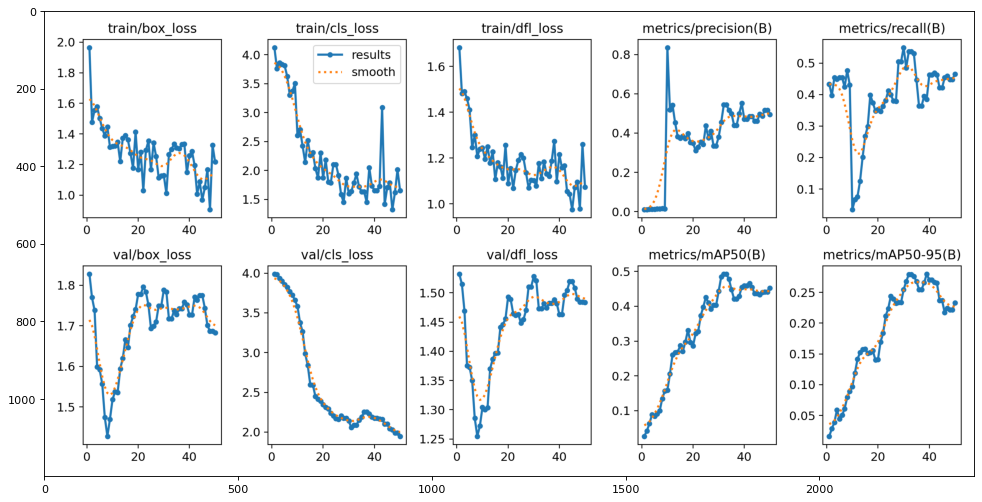

In [18]:
figure(figsize=(15, 10), dpi=80)
# reading the image 
results = img.imread("../Rough Work/runs/detect/train4/results.png")   
# displaying the image 
plt.imshow(results) 

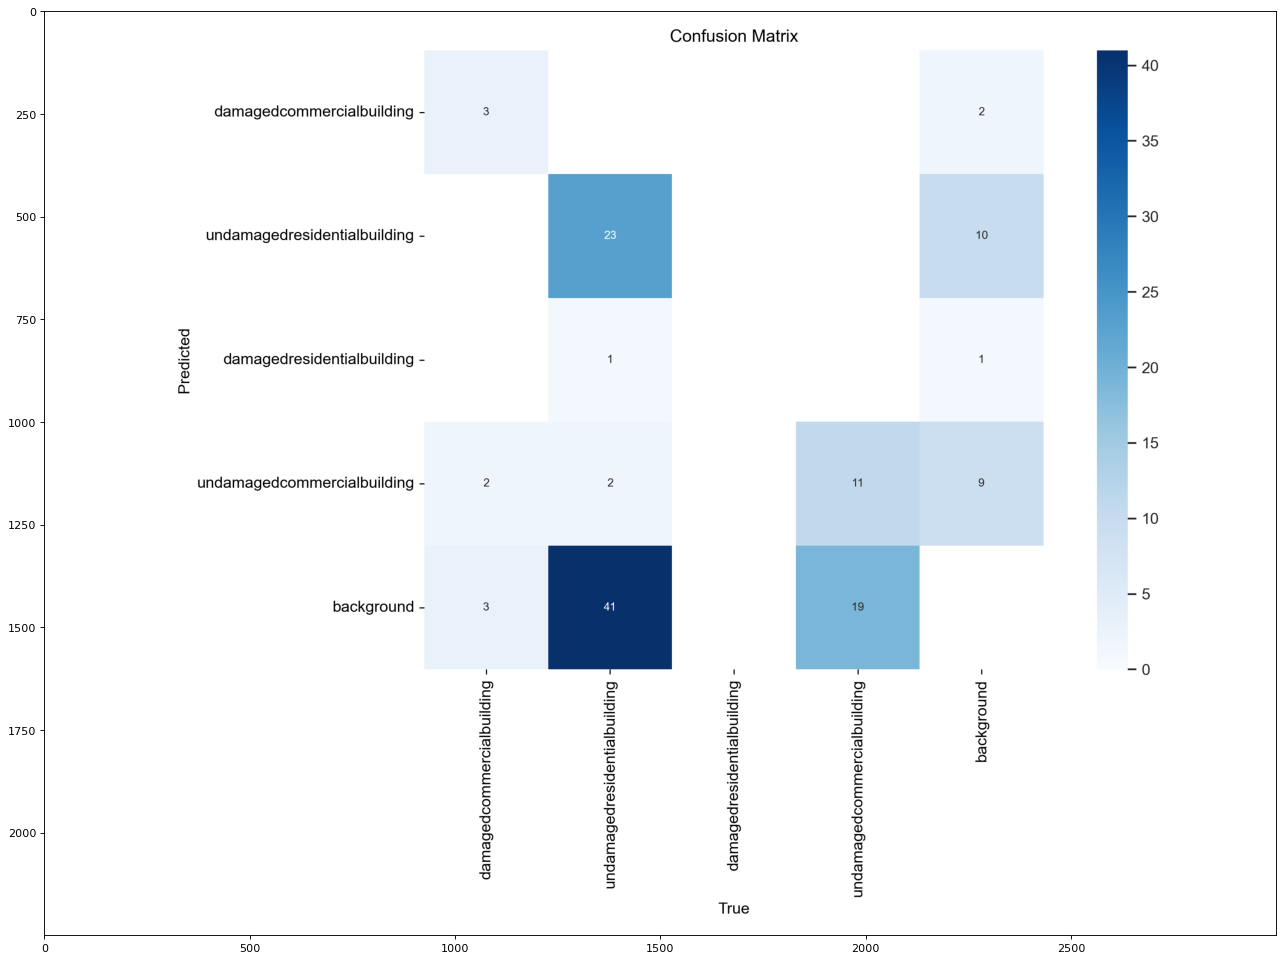

In [22]:
figure(figsize=(20,15), dpi=80)  
# reading the image 
cf = img.imread("../Rough Work/runs/detect/train4/confusion_matrix.png") 
# displaying the image 
plt.imshow(cf) 